<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_03-Exploratory_Data_Analysis/Week_03_Data_Prep_and_EDA_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 03 - Data Prep and Exploratory Data Analysis (EDA)

Your Name

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

## Functions, Methods, and Attributes

* df.shape: attribute; values that are precomputed
* df.head(): method; values are computed when called; belongs to a class, package, module, an object
* my_func(): function; usually created by programmer; set of instructions that perform a task

## Data Prep

### More Data Resources

* https://www.statsmodels.org/devel/datasets/index.html
* https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
* http://lib.stat.cmu.edu/datasets/
* https://www.kaggle.com/datasets
* https://registry.opendata.aws/
* https://dataportals.org/
* https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex
* https://data.nasdaq.com/
* http://radar.oreilly.com/2011/01/journalist-data-tools.html
* https://www.reddit.com/r/datasets/
* https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html
* https://github.com/vincentarelbundock/Rdatasets
* https://data.world/
* https://data.gov/
* https://registry.opendata.aws/
* https://cloud.google.com/datasets
* https://cloud.google.com/bigquery/public-data
* https://services.google.com/fh/files/misc/public_datasets_one_pager.pdf

## Data Driven Decision Making

* Von Neumann, Dr. Strangelove, and Game Theory
* https://thecritic.co.uk/issues/february-2022/the-genius-that-was-dr-strangelove/
* https://en.wikipedia.org/wiki/Theory_of_Games_and_Economic_Behavior
* https://medium.com/@skueong/thinking-in-bets-making-smarter-decisions-when-you-dont-have-all-the-facts-book-notes-98f02db61c1a
* Westley vs Vizzini and the poison drinks (The Princess Bride)
* https://www.cbr.com/battle-of-wits-scene-sham-theory-princess-bride/
* A lethal battle of wits, Thinking in Bets

### Errors

In [1]:
# download class-grades from github and upload it to session storage
# print shape, info, and first five rows
import pandas as pd

grades = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/class-grades2.csv', on_bad_lines='warn')
print(grades.shape)
print(grades.info())
grades.head()

(103, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       103 non-null    int64  
 1   Assignment1  99 non-null     float64
 2   Tutorial     91 non-null     float64
 3   Midterm      97 non-null     float64
 4   Quiz         97 non-null     float64
 5   Final        100 non-null    float64
 6   TakeHome     96 non-null     object 
 7   Student      103 non-null    int64  
 8   Misc         2 non-null      float64
 9   Nothing      0 non-null      float64
 10  FinalGrade   103 non-null    int64  
 11  BiLabel      103 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 9.8+ KB
None


Skipping line 33: expected 12 fields, saw 13



,Prefix,Assignment1,Tutorial,Midterm,Quiz,Final,TakeHome,Student,Misc,Nothing,FinalGrade,BiLabel
0,5,57.14,34.09,64.38,64.38,52.50,F,1,0.0,NaN,54,pepper
1,8,95.05,105.49,67.50,67.50,68.33,C,1,NaN,NaN,81,pepper
2,8,83.70,83.17,30.00,30.00,48.89,D,1,NaN,NaN,55,salt
3,7,81.22,96.06,49.38,49.38,80.56,C,1,NaN,NaN,71,salt
4,8,91.32,NaN,95.00,95.00,73.89,B,1,NaN,NaN,89,salt


### Missing Values

Missing data cause problems because most statistical procedures require a value for each variable. When a data set is incomplete, the data analyst has to decide how to deal with it.

https://www.theanalysisfactor.com/causes-of-missing-data/<br />
https://www.theanalysisfactor.com/when-listwise-deletion-works/

* MCAR: Missing Completely at Random
    * Probability of missing is same for all cases
    * I tripped and broke the test tubes I was carrying
    * Missing because not sampled
* MNAR: Missing Not at Random
    * Probability of missing is not the same for all cases
    * Data are missing on IQ and only the people with low IQ values have missing observations for this variable
    * Missing from public opinion because respondent maybe inhibited or have bias
* MAR: Mising at Random
    * Probability of missing is the same only within groups
    * Probability of sample depends on some known property
    * Only younger people have missing values for IQ

https://stefvanbuuren.name/fimd/sec-MCAR.html<br />
https://www.iriseekhout.com/post/2022-06-28-missingdatamechanisms/

### Complete-Case Analysis (CCA)

* Aka Listwise deletion
* Reduces sample size
* Can reduce the statistical efficiency of estimates

In [2]:
# delete rows with missing values example of cca
print(grades.shape)
print(grades.dropna().shape)

(103, 12)
(0, 12)


### Cardinality of Features
* Uneven distribution of labels between train and test sets (some may appear in one set and not in other)
* Features with many labels dominate over those with fewer labels
* Many labels introduces noise with little or no information
* Reducing may help model performance
* Removing features with low cardinality my help model performance

In [3]:
# features with only one value (constant)
constant_features = [
    feat for feat in grades.columns if len(grades[feat].unique()) == 1
]

print(grades.shape)
constant_features

(103, 12)


['Student', 'Nothing']

In [4]:
# drop constant_features
grades.drop(constant_features, axis=1, inplace=True)
print(grades.shape)

(103, 10)


In [5]:
# identify quasi constant values (sometimes these may be boolean/binary features)
quasi_consts = []
for val in grades.columns.sort_values():
    if (len(grades[val].unique()) < 3):
        val_counts = grades[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

salt      0.514563
pepper    0.485437
Name: BiLabel, dtype: float64
0.0    1.0
Name: Misc, dtype: float64
quasi_consts ['Misc']


In [6]:
# drop quasi_consts
grades.drop(quasi_consts, axis=1, inplace=True)
grades.shape

(103, 9)

### Duplications

In [7]:
# duplicate rows
grades[grades.duplicated(keep=False)]

,Prefix,Assignment1,Tutorial,Midterm,Quiz,Final,TakeHome,FinalGrade,BiLabel
0,5,57.14,34.09,64.38,64.38,52.50,F,54,pepper
1,8,95.05,105.49,67.50,67.50,68.33,C,81,pepper
2,8,83.70,83.17,30.00,30.00,48.89,D,55,salt
3,7,81.22,96.06,49.38,49.38,80.56,C,71,salt
4,8,91.32,NaN,95.00,95.00,73.89,B,89,salt
5,5,57.14,34.09,64.38,64.38,52.50,F,54,pepper
6,8,95.05,105.49,67.50,67.50,68.33,C,81,pepper
7,8,83.70,83.17,30.00,30.00,48.89,D,55,salt
8,7,81.22,96.06,49.38,49.38,80.56,C,71,salt
9,8,91.32,NaN,95.00,95.00,73.89,B,89,salt


In [8]:
# drop duplicate rows
print(grades.shape)
grades.drop_duplicates(inplace=True)
grades.shape

(103, 9)


(98, 9)

In [9]:
# check of duplications
duplicated_feats = []
for i in range(0, len(grades.columns)):
    orig = grades.columns[i]

    for dupe in grades.columns[i + 1:]:
        if grades[orig].equals(grades[dupe]):
            duplicated_feats.append(dupe)

duplicated_feats

['Quiz']

In [10]:
# drop duplicated_feats
print(grades.shape)
grades.drop(duplicated_feats, axis=1, inplace=True)
grades.shape

(98, 9)


(98, 8)

### Any vs All

In [11]:
# count nulls
grades.isnull().sum()

Prefix          0
Assignment1     4
Tutorial       11
Midterm         6
Final           3
TakeHome        7
FinalGrade      0
BiLabel         0
dtype: int64

In [12]:
# drop columns with null values https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
print(grades.shape)
grades.dropna(how='all', axis='columns', inplace=True) # 1
print(grades.shape)

(98, 8)
(98, 8)


In [13]:
# drop rows with null values
print(grades.shape)
print(grades.dropna(how='any', axis='index').shape) # information is lost when we drop

(98, 8)
(67, 8)


## Exploratory Data Analysis

### Descriptive Statistics

* Descriptive statistics: the numbers and calculations we use to summarize raw data
* The mean is prone to distortion by outliers so we have the median
* Elon Musk and Tiny Homes, 35000 till Elon joins and then average income jumps to $91 million
* Absolute statistic vs relative statistic
* Standard deviation: how dispersed the data from the mean, how spread out
* Descriptive statistics are often used to compare two quantities

### Anscombes Quartet
Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed.
https://en.wikipedia.org/wiki/Anscombe%27s_quartet

### Deceptive Statitics

* The use of statistics to describe complex phenomena is not exact
* Again precision and accuracy
* Precision can mask inaccuracy
* In 1950, Joseph McCarthy waved a piece of paper in a speech and declared he had a list of 205 names known to the Secretary of State that were working in the State Department. The paper was blank and this was an outright lie, but the specificity gave the lie credibility
* Measurements, or calculations, no matter how precise, need to be checked with common sense
* Descriptive statistics may suffer from clarity over exactly what is being described
* Be sure to present a range of statistics with a range of perspectives
* Our schools are getting worse! 60% of our schools had lower test scores this year from last
* Our schools are getting better! 80% of our students had higher test scores from last year
* Not all schools/students are equal and it depends on the unit of analysis
* One measured schools and the other measured students

## Explanatory Analysis vs Exploratory Analysis

Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones. Explanatory analysis is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones.

https://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis

### Train Test Split

In [14]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(78, 7)
(20, 7)


In [15]:
# info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 54 to 56
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       78 non-null     int64  
 1   Assignment1  74 non-null     float64
 2   Tutorial     69 non-null     float64
 3   Midterm      72 non-null     float64
 4   Final        75 non-null     float64
 5   TakeHome     72 non-null     object 
 6   BiLabel      78 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 4.9+ KB


In [16]:
# brief statistics
X_train.describe()

,Prefix,Assignment1,Tutorial,Midterm,Final
count,78.000000,74.000000,69.000000,72.000000,75.000000
mean,7.269231,85.815135,90.867246,65.790417,68.544667
std,0.962587,12.597692,14.426439,18.759731,17.811513
min,4.000000,28.140000,34.090000,28.750000,28.060000
25%,7.000000,81.840000,86.850000,51.250000,55.415000
50%,7.500000,90.215000,93.680000,66.565000,66.110000
75%,8.000000,93.830000,100.580000,79.847500,83.195000
max,8.000000,100.830000,112.580000,106.250000,108.890000


In [17]:
# value counts
X_train['TakeHome'].str.lower().value_counts(dropna=False)

a      22
b      22
c      11
d       9
f       8
NaN     6
Name: TakeHome, dtype: int64

<Axes: ylabel='TakeHome'>

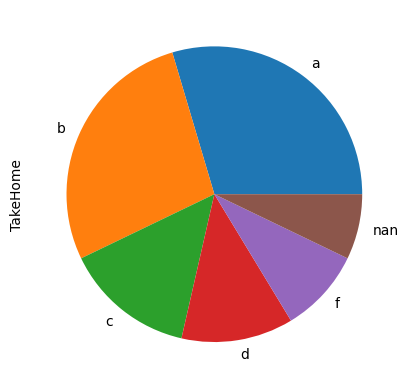

In [18]:
# pie chart
grades['TakeHome'].str.lower().value_counts(dropna=False).plot.pie()

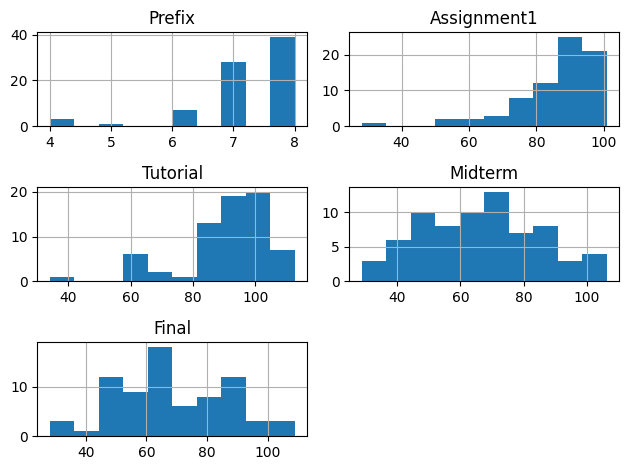

In [19]:
# show histograms
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout()

## Measures of Center
* Mean
* Median
* Mode

And the Normal Distribution: https://www.mathsisfun.com/data/standard-normal-distribution.html

In [20]:
# mean, median, mode
import numpy as np

print('mean:', int(np.mean(X_train['Assignment1'])))
print('mean:', int(X_train['Assignment1'].mean()))
print('median:', int(X_train['Assignment1'].median()))
print('mode:', X_train['TakeHome'].mode())
print('mode:', X_train['TakeHome'].mode()[0])

mean: 85
mean: 85
median: 90
mode: 0    B
Name: TakeHome, dtype: object
mode: B


In [21]:
X_train['TakeHome'].value_counts()

B    22
A    21
C    11
D     9
F     8
a     1
Name: TakeHome, dtype: int64

right skew data mean: 7.99, median: 6.76
left skew data mean: -7.95, median: -6.72
normal data mean: 0.0, median: 0.01


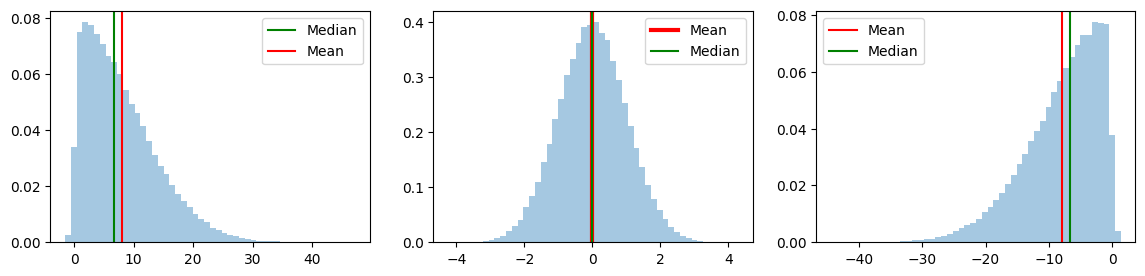

In [22]:
# what happens to the mean and median with skewed data
import numpy as np
from scipy.stats import skewnorm, norm
from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
skew = 20
n = 100000

r = skewnorm.rvs(skew, loc=0, scale=10, size=n)
ax[0].hist(r, bins=50, density=True, alpha=0.4)
ax[0].axvline(x=np.median(r), color='green', label='Median')
ax[0].axvline(x=np.mean(r).round(2), color='red', label='Mean')
ax[0].legend()
print(f'right skew data mean: {np.mean(r).round(2)}, median: {np.median(r).round(2)}')

l = skewnorm.rvs(-skew, loc=0, scale=10, size=n)
ax[2].hist(l, bins=50, density=True, alpha=0.4);
ax[2].axvline(x=np.mean(l).round(2), color='red', label='Mean')
ax[2].axvline(x=np.median(l), color='green', label='Median')
ax[2].legend()
print(f'left skew data mean: {np.mean(l).round(2)}, median: {np.median(l).round(2)}')

n = norm.rvs(loc=0, scale=1, size=n)
ax[1].hist(n, bins=50, density=True, alpha=0.4);
ax[1].axvline(x=np.mean(n).round(2), color='red', linewidth=3, label='Mean')
ax[1].axvline(x=np.median(n), color='green', label='Median')
ax[1].legend()
print(f'normal data mean: {np.mean(n).round(2)}, median: {np.median(n).round(2)}')

### The Wisdom of the Crowd, The Median

### Imputing Missing Values

In [23]:
X_train.isnull().sum()

Prefix         0
Assignment1    4
Tutorial       9
Midterm        6
Final          3
TakeHome       6
BiLabel        0
dtype: int64

In [24]:
# replace missing values with mean
X_train['Assignment1'].fillna(X_train['Assignment1'].round(decimals=2).mean(), inplace=True)
X_train.isnull().sum()

Prefix         0
Assignment1    0
Tutorial       9
Midterm        6
Final          3
TakeHome       6
BiLabel        0
dtype: int64

In [25]:
# replace missing values for Tutorial, Midterm, Quiz, and Final using the example above

## Measures of Spread

### Variance

Equation for mean:<br />
$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$

https://www.statology.org/sample-variance-vs-population-variance/<br />
Equation for population variance:<br />
$\sigma^2 = \frac{1}{N}\sum({x}-\bar{x})^2$

Equation for sample variance:<br />
$s^2 = \frac{1}{n-1}\sum({x}-\bar{x})^2$

Equation for standard deviation:<br />
$\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

In [26]:
# Assignment variance and standard deviation
print('Population variance:', X_train['Final'].var(ddof=0))
print('Sample variance:', X_train['Final'].var(ddof=1))
print('Population std dev:', X_train['Final'].std(ddof=0))
print('Sample std dev:', X_train['Final'].std(ddof=1))
print('Square root of sample variance:', np.sqrt(X_train['Final'].var()))
print('Square root of sample variance:', X_train['Final'].var()**(1/2))

Population variance: 313.0199875555556
Sample variance: 317.2499873873874
Population std dev: 17.692370885654515
Sample std dev: 17.811512776499008
Square root of sample variance: 17.811512776499008
Square root of sample variance: 17.811512776499008


### Quartiles

https://en.wikipedia.org/wiki/Interquartile_range

Interquartile range<br />
Whiskers<br />

Outliers<br />
Fence<br />
https://www.statisticshowto.com/upper-and-lower-fences/

Boxplots<br />
Violin plots

### Percentages

* Naked Statistics - the dress and 25% markdown
* Art of Statistics Chapter 2 - 5% mortality sounds much worse than 95% survival

<Axes: >

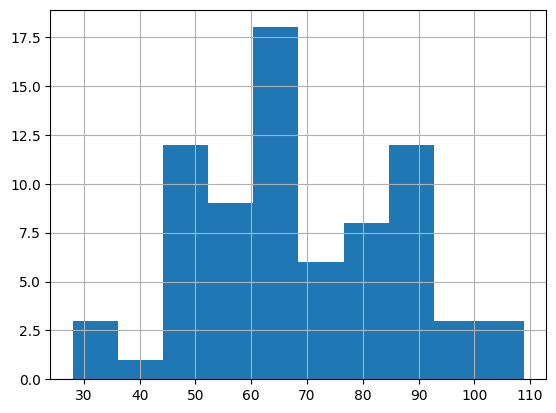

In [27]:
# Assignment histogram
X_train['Final'].hist()

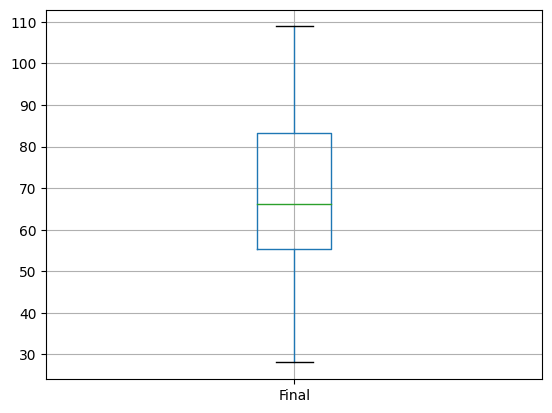

In [28]:
# Assignment boxplot
X_train.boxplot(column=['Final']);

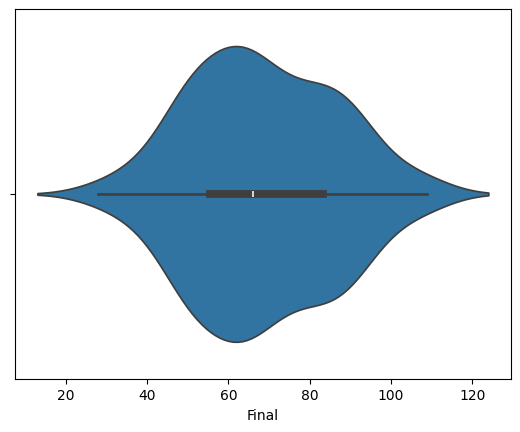

In [29]:
# Assignment violinplot
import seaborn as sns

sns.violinplot(x=X_train['Final']);

## Measures of Shape

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

**Skewness**
* Skewed right
* Skewed left

**Kurtosis**
* Mesokurtic
* Leptokurtic
* Platykurtic

mean before outliers: -0.10384651739409385
var before outliers: 0.8165221946938582


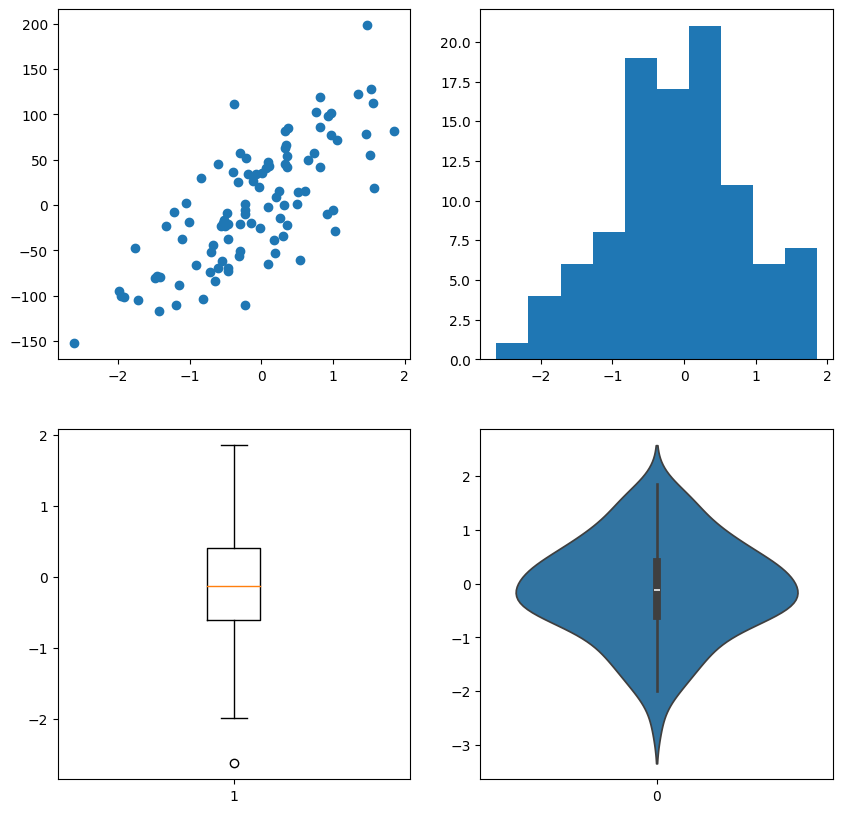

In [30]:
# visualize outliers before and after
from random import random
from random import randint
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
print('mean before outliers:', np.mean(X))
print('var before outliers:', np.var(X))
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(X, y)
ax2.hist(X)
ax3.boxplot(X)
sns.violinplot(ax=ax4, data=X);

mean after outliers: -0.25134520371988117
var after outliers: 2.6748224762419763


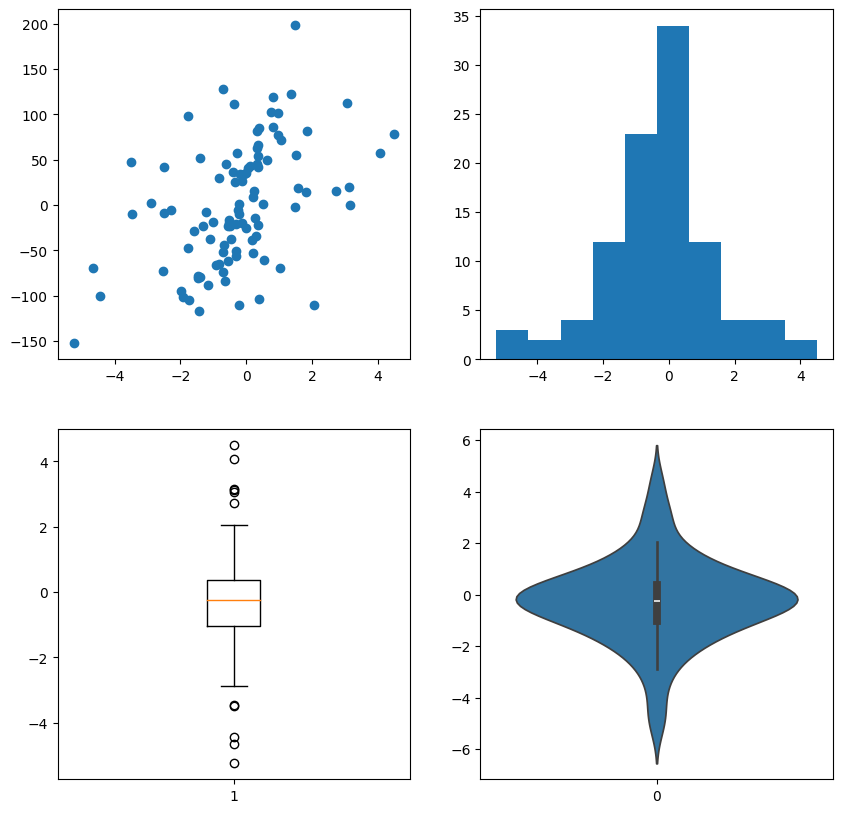

In [31]:
# create outliers
for i in range(30):
    factor = randint(-3, 3)
    if random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(X, y)
ax2.hist(X)
ax3.boxplot(X)
sns.violinplot(ax=ax4, data=X)
print('mean after outliers:', np.mean(X))
print('var after outliers:', np.var(X))

### Skewed data

https://www.itl.nist.gov/div898/handbook/eda/section3/eda33e6.htm

Occur due to upper or lower bounds on the data<br />
https://www.mathsisfun.com/definitions/upper-bound.html<br />
Mean, Median, and Mode should be mentioned because there is no center in the usual sense<br />

**Right Skewed**
* Tail is on the right side
* Mode Median Mean
* Data have a lower bound

**Left Skewed**
* Tail is on the left
* Mean Median Mode
* Data have an upper bound

<Axes: >

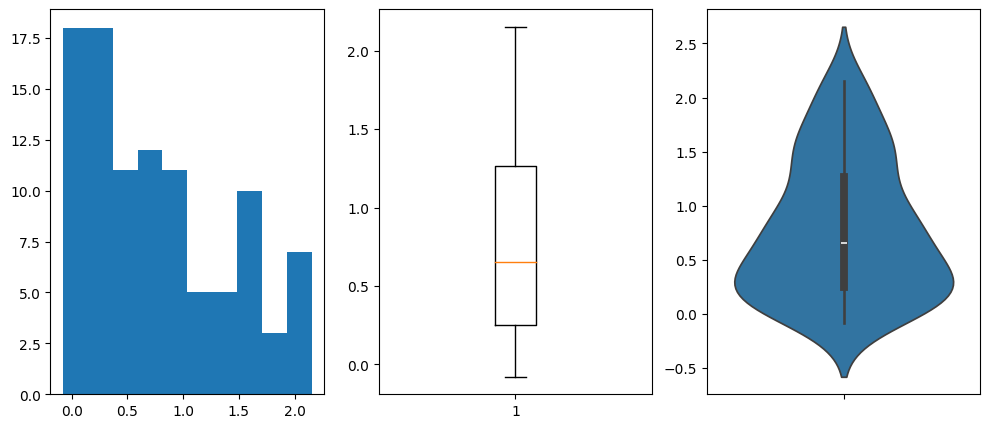

In [32]:
# creating skewed data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
from scipy.stats import skewnorm

a = 4 # skewness parameter: positive values are right skewed, negative values are left skewed
X = skewnorm.rvs(a, size=100)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(X)
ax2.boxplot(X)
sns.violinplot(ax=ax3, data=X)

### Kurtosis

https://www.investopedia.com/terms/p/platykurtic.asp

* Mesokurtic: Extreme events are rare, resembles normal distribution
* Platykurtic: Excess kurtosis is negative (< 3) and has thinner tails. Fewer extreme events. In finance, risk-averse investors might perfer platykurtic distributions
* Leptokurtic: Excess kurtosis is greater than 3 and has fatter tails. Caused by extreme events or outliers.

According to Investopedia (2022):

> Risk-seeking investors can focus on investments whose returns follow a leptokurtic distribution, to maximize the chances of rare events—both positive and negative (para 3).

Sources:
* Leptokurtic Definition. (2022, February 1). In *Investopedia*. https://www.investopedia.com/terms/l/leptokurtic.asp.
* https://medium.com/@filip.sekan/4-ways-how-to-shape-histograms-appearance-a87764df1417
* https://miro.medium.com/v2/resize:fit:1100/format:webp/1*m2X-C-IMcYORq7G5mzvAzg.png

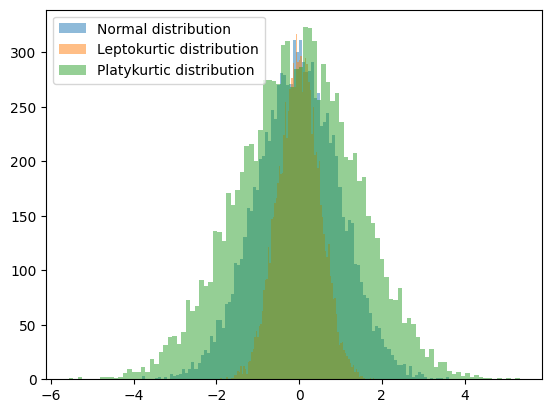

In [33]:
import numpy as np
from scipy.stats import norm

# generate a normal distribution
normal_dist = norm(0, 1)
normal_samples = normal_dist.rvs(10000)

# generate a leptokurtic distribution
leptokurtic_dist = norm(loc=0, scale=0.5)
leptokurtic_samples = leptokurtic_dist.rvs(10000)

# generate a platykurtic distribution
platykurtic_samples = normal_samples + np.random.randn(10000)

# plot the distributions
import matplotlib.pyplot as plt
plt.hist(normal_samples, bins=100, alpha=0.5, label='Normal distribution')
plt.hist(leptokurtic_samples, bins=100, alpha=0.5, label='Leptokurtic distribution')
plt.hist(platykurtic_samples, bins=100, alpha=0.5, label='Platykurtic distribution')
plt.legend()
plt.show()

https://www.kaggle.com/getting-started/170781

Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

The topic of Kurtosis has been controversial for decades now, the basis of kurtosis all these years has been linked with the peakedness but the ultimate verdict is that outliers (fatter tails) govern the kurtosis effect far more than the values near the mean (peak).

https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85

### Moments

According to Wikipedia (2022):

>  If the function is a probability distribution, then the first moment is the expected value, the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis (para 1).

Moment (mathematics). (2022, January 31). In *Wikipedia*. https://en.wikipedia.org/wiki/Moment_(mathematics).

Mean:<br />
$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$v

Variance:<br />
$s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$

Skewness:<br />
$\frac{\frac{1}{n}\sum(x - \mu)^3}{\sigma^3}$

Kurtosis:<br />
$\frac{\frac{1}{n}\sum(x - \mu)^4}{\sigma^4}$

More reading: https://gregorygundersen.com/blog/2020/04/11/moments/

## Correlation

According to Wikipedia (2022):

>  In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related. Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase... Correlations - 2 are useful because they can indicate a predictive relationship that can be exploited in practice (paras. 1 - 2).

Correlation. (2022, February 1). In *Wikipedia*. https://en.wikipedia.org/wiki/Correlation.

Correlation does not cause causation. Warm days on the beach, ice cream, and shark bites.

Covariance:<br />
$cov(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$

* Shows how variables change together
* A measure of correlation
* Measures direction

Pearson’s r (correlation coefficient):<br />
$\rho_{x,y} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

* Shows linear relationship between two continuous variables
* How one variable changes as another variable changes
* Measures both strength and direction

Resources:

* https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php
* https://www.mygreatlearning.com/blog/covariance-vs-correlation/


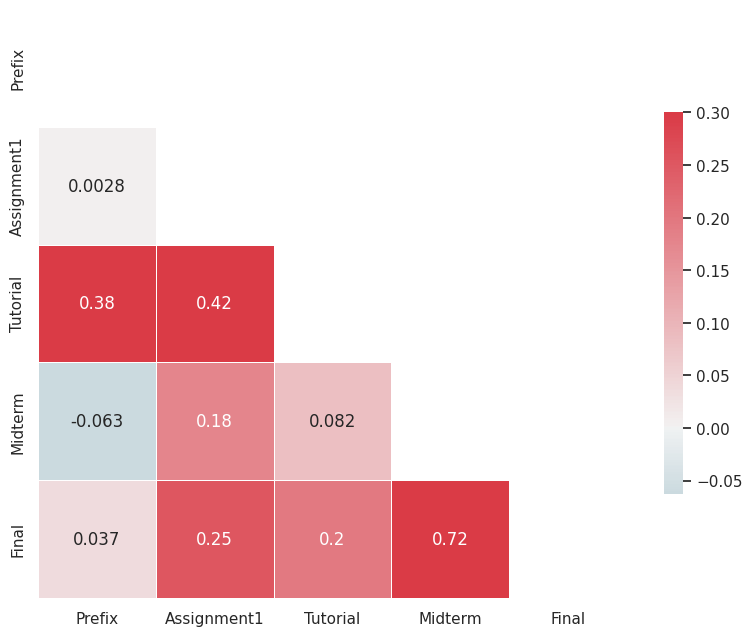

In [36]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

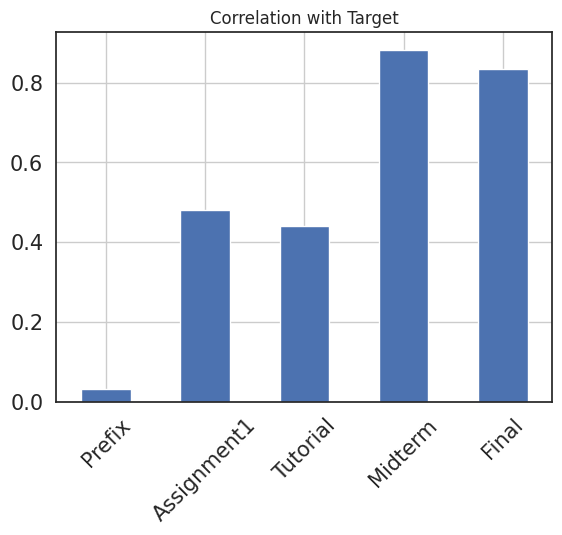

In [35]:
# showing correlation of multiple features with one target
X_train.corrwith(y_train, numeric_only=True).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

### Multicollinearity
The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:
* The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
* Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.
* Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.
https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

### Spurious Correlations

* https://www.tylervigen.com/spurious-correlations

## SweetViz

* Pandas-Profiling
* Autoviz
* D-Tale
* https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae
* https://pypi.org/project/sweetviz/
* https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing

## Project Part I

Presentations start next week

* Think of a data science project you'd like to work on for the rest of the semester that uses a dataset
* Think about a story you want to tell with this data
* Introduce this dataset to the class and describe the dataset
  * Train Test Datasets
  * Shape, Info, Simple descriptives
  * Missing values
  * Histograms - Skewness Kurtosis
  * Correlations

Hints

* Keep the dataset simple if possible
* If you change your mind later, it's ok but a complete analysis as per the instructions in class will still be needed.